In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_utils import binToDf
sns.set_theme(font_scale=2)
import pyarma as pa


In [2]:
def extract_data(files):
    summary = pd.DataFrame(columns=['L', 'T', 'E', 'M', 'C', 'X'])
    eng = np.zeros(len(files))
    mag = np.zeros(len(files))
    cv = np.zeros(len(files))
    chi = np.zeros(len(files))
    temp = np.zeros(len(files))
    grid = np.zeros(len(files))
    for index, file in enumerate(files):
        df = binToDf(file)
        temp[index] = df.temperature[0] 
        grid[index] = df.gridsize[0]
        eng[index] = df.energy[int(0.2*1e6):].mean()/df.gridsize[0]**2
        eng2 = np.mean(df.energy[int(0.2*1e6):]**2)/df.gridsize[0]**4
        mag[index] = np.mean(abs(df.magnetization[int(0.2*1e6):]))/df.gridsize[0]**2
        mag2 = np.mean(df.magnetization[int(0.2*1e6):]**2)/df.gridsize[0]**4
        cv[index] = 1/(df.gridsize[0]**2*temp[index]**temp[index])*(eng2 - eng[index]**2)
        chi[index] = 1/(df.gridsize[0]**2*temp[index])*(mag2 - mag[index]**2)
    
    summary['L'] = grid
    summary['T'] = temp
    summary['E'] = eng
    summary['M'] = mag
    summary['C'] = cv
    summary['X'] = chi
    return summary

In [3]:
def scatter_plot(xs, ys, xlabel, ylabel, labels, savefig=False, filename='plot.png'):
    fig, axs = plt.subplots(1, 1, figsize = (10, 10))
    for index, x in enumerate(xs):
        axs.plot(x, ys[index], linestyle='--')
        axs.scatter(x, ys[index], label=labels[index])

    axs.set_ylabel(ylabel)
    axs.set_xlabel(xlabel)
    lgd = fig.legend(loc = 'lower center', ncol = len(xs), fancybox = True, 
                bbox_to_anchor = (0.5, -0.05))
    fig.tight_layout()
    plt.show()
    if savefig:
        plt.savefig(filename)

In [5]:
files40 = [f'../output/40_close/L=40_{i}.bin' for i in range(1, 32)]
files60 = [f'../output/60_close/L=60_{i}.bin' for i in range(1, 32)]
files80 = [f'../output/80_close/L=80_{i}.bin' for i in range(1, 32)]
files100 = [f'../output/100_close/L=100_{i}.bin' for i in range(1, 32)]

data40 = extract_data(files40)
data60 = extract_data(files60)
data80 = extract_data(files80)
data100 = extract_data(files100)
data = [data40, data60, data80, data100]#, data80, data100]

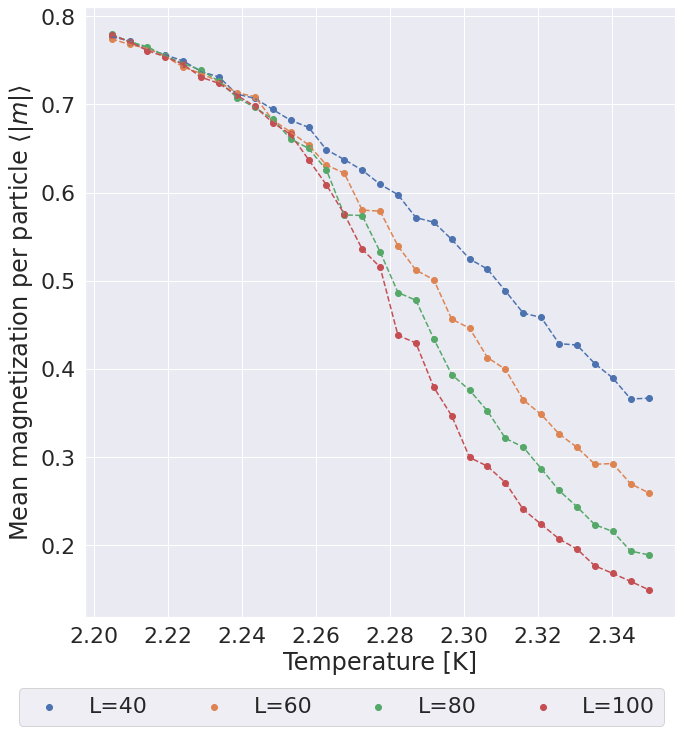

In [6]:
mags = [d['M'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'Mean magnetization per particle $\langle|m|\rangle$'
scatter_plot(temps, mags, xlabel, ylabel, labels)

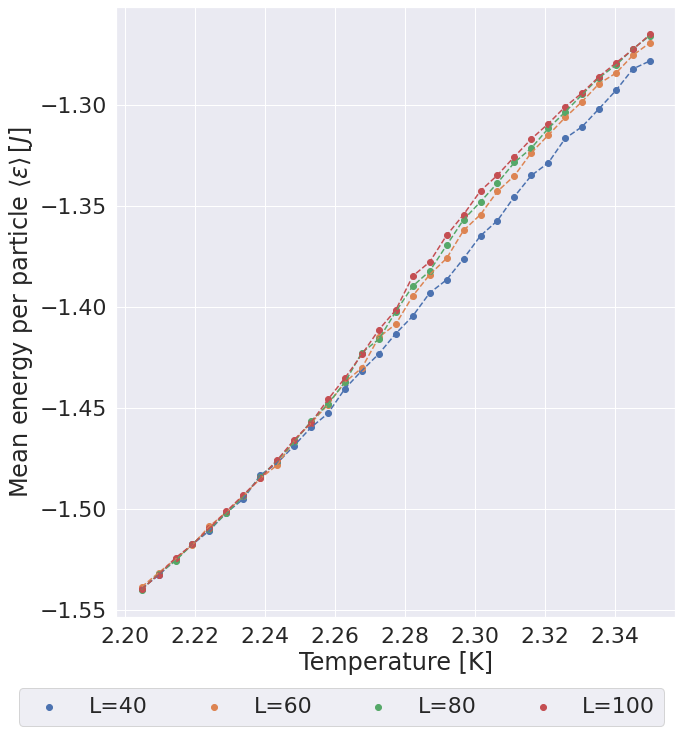

In [7]:
engs = [d['E'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'Mean energy per particle $\langle\epsilon\rangle\, [J]$'
scatter_plot(temps, engs, xlabel, ylabel, labels)

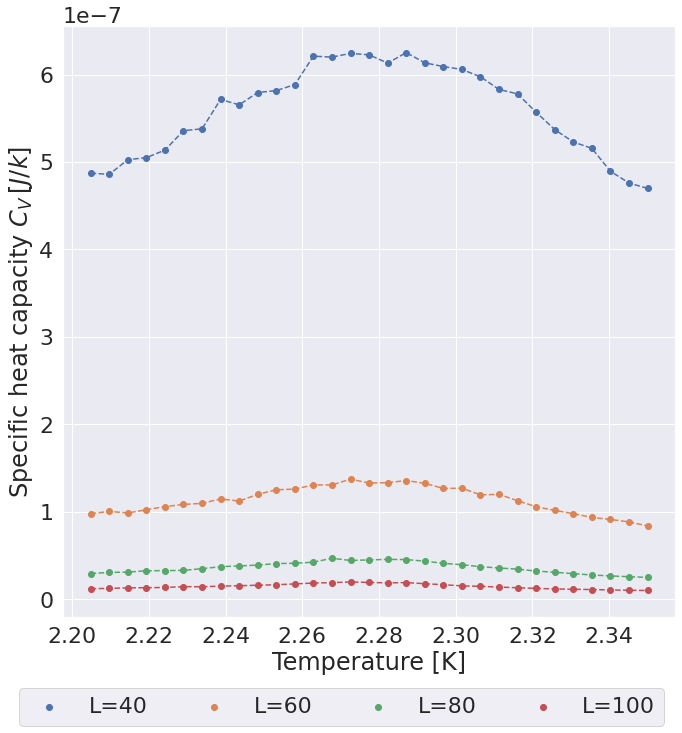

In [8]:
heatcap = [d['C'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'Specific heat capacity $C_V\, [J/k]$'
scatter_plot(temps, heatcap, xlabel, ylabel, labels)

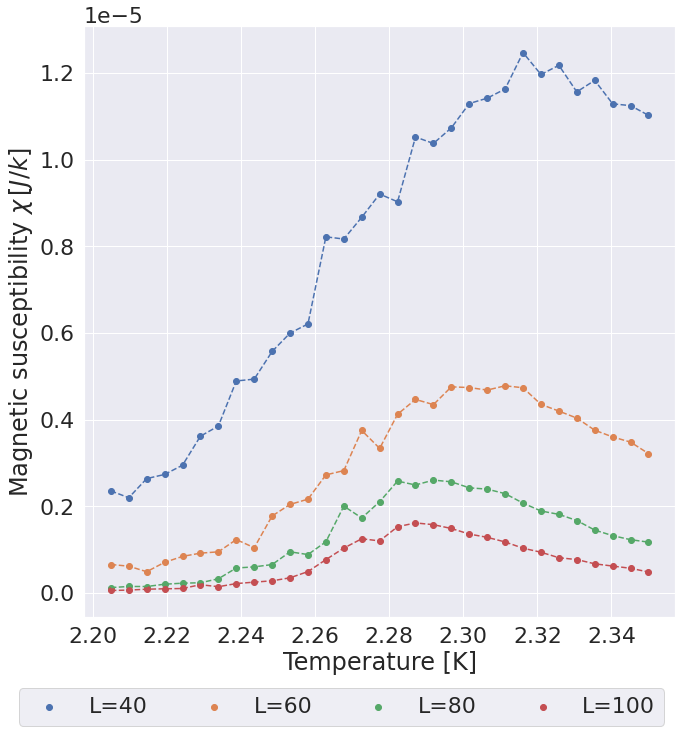

In [9]:
magsusc = [d['X'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'Magnetic susceptibility $\chi\, [J/k]$'
scatter_plot(temps, magsusc, xlabel, ylabel, labels)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

left, bottom = 0.05, 0.1 # for very left and very bottom
thickx, thicky = 0.03, 0.125 # thickness of the left and bottom plots
width, height = 0.75, 0.6 # width and height of main plot
dpx = .025 # space between plots
dpy = .08

# axes for each of the three plots: [left,bottom,width,height]
rect_main = [left+thickx+dpx,bottom+thicky+dpy,width+.153,height] # main plot
rect_left = [left,bottom+thicky+dpy,thickx,height] # left side small plot
rect_bottom = [left+thickx+dpx,bottom,width,thicky] # bottom small plot
nullfmt   = plt.NullFormatter()         # no labels
nullloc   = plt.NullLocator()         

# start with a rectangular figure
plt.figure(1,figsize=(10,20))

axMain = plt.axes(rect_main)
plt.scatter(temp40, mag40, label = 'L = 40')
plt.plot(temp40, mag40, linestyle = '--')
plt.scatter(temp60, mag60, label = 'L = 60')
plt.plot(temp60, mag60, linestyle = '--')
plt.scatter(temp80, mag80, label = 'L = 80')
plt.plot(temp80, mag80, linestyle = '--')
plt.scatter(temp100, mag100, label = 'L = 100')
plt.plot(temp100, mag100, linestyle = '--')
plt.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.2))


axMain.set_xlim(2.08, 2.42)
axMain.set_ylim(0.0, 2.5)
axMain.set_yticks(np.arange(0, 1.2, 0.2))

axins = zoomed_inset_axes(axMain,1.8,loc='upper center') # zoom=6

mask40 = np.where(mag40Z < 1.0)[0]
mask40 = [0, 2, 4, 6, 8, 9]
plt.scatter(temp40Z[mask40], mag40Z[mask40])
plt.plot(temp40Z[mask40], mag40Z[mask40], linestyle = '--')

mask60 = np.where(mag60Z < 1.0)[0]
mask60 = [0, 3, 5, 6, 8]

plt.scatter(temp60Z[mask60], mag60Z[mask60])
plt.plot(temp60Z[mask60], mag60Z[mask60], linestyle = '--')

mask80 = np.where(mag80Z < 1.0)[0]
plt.scatter(temp80Z[mask80], mag80Z[mask80])
plt.plot(temp80Z[mask80], mag80Z[mask80], linestyle = '--')


mask100 = np.where(mag100Z < 1.0)[0]
mask100 = [0, 2, 3, 6, 8, 9]
plt.scatter(temp100Z[mask100], mag100Z[mask100])
plt.plot(temp100Z[mask100], mag100Z[mask100], linestyle = '--')

# subregion of the original image
x1,x2,y1,y2 = 2.21, 2.36, 0.14, 0.80
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
#plt.setp(axins,xticks=[],yticks=[])
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(axMain, axins, loc1=2, loc2=4, ec="0.5")
plt.savefig('test.png')
plt.draw()

